In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("../data/sleep_data.csv")

In [3]:
raw_data

,Data,Dia da semana,Pontuação,Início,Fim,Duração,Regularidade,Sono profundo,REM,Tempo acordado,Vezes acordado
0,01/05,quinta-feira,72,22:39,06:43,07:58,90,00:39,01:42,6,3
1,02/05,sexta-feira,93,22:32,06:22,07:44,90,01:20,01:10,6,1
2,03/05,sábado,80,22:19,07:30,08:59,90,01:23,01:36,12,4
3,04/05,domingo,77,22:17,07:21,08:35,95,01:12,01:45,29,4
4,05/05,segunda-feira,85,22:08,05:31,07:08,89,01:12,01:38,15,2
...,...,...,...,...,...,...,...,...,...,...,...
68,08/07,terça-feira,78,22:33,07:20,08:39,71,01:03,01:58,8,3
69,09/07,quarta-feira,82,22:29,06:59,08:25,75,01:13,01:14,5,3
70,10/07,quinta-feira,76,00:34,08:30,07:52,74,00:58,01:30,4,2
71,11/07,sexta-feira,85,22:52,07:04,08:03,77,01:16,01:38,9,2


In [4]:
raw_data["Sono profundo"] = raw_data["Sono profundo"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["REM"] = raw_data["REM"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["Duração (min)"] = raw_data["Duração"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))

In [5]:
raw_data

,Data,Dia da semana,Pontuação,Início,Fim,Duração,Regularidade,Sono profundo,REM,Tempo acordado,Vezes acordado,Duração (min)
0,01/05,quinta-feira,72,22:39,06:43,07:58,90,39,102,6,3,478
1,02/05,sexta-feira,93,22:32,06:22,07:44,90,80,70,6,1,464
2,03/05,sábado,80,22:19,07:30,08:59,90,83,96,12,4,539
3,04/05,domingo,77,22:17,07:21,08:35,95,72,105,29,4,515
4,05/05,segunda-feira,85,22:08,05:31,07:08,89,72,98,15,2,428
...,...,...,...,...,...,...,...,...,...,...,...,...
68,08/07,terça-feira,78,22:33,07:20,08:39,71,63,118,8,3,519
69,09/07,quarta-feira,82,22:29,06:59,08:25,75,73,74,5,3,505
70,10/07,quinta-feira,76,00:34,08:30,07:52,74,58,90,4,2,472
71,11/07,sexta-feira,85,22:52,07:04,08:03,77,76,98,9,2,483


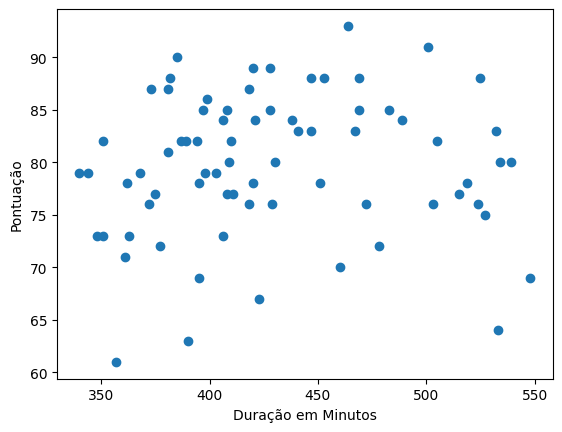

In [ ]:
plt.scatter(x=raw_data["Duração (min)"], y=raw_data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("Duração em Minutos")
plt.show()

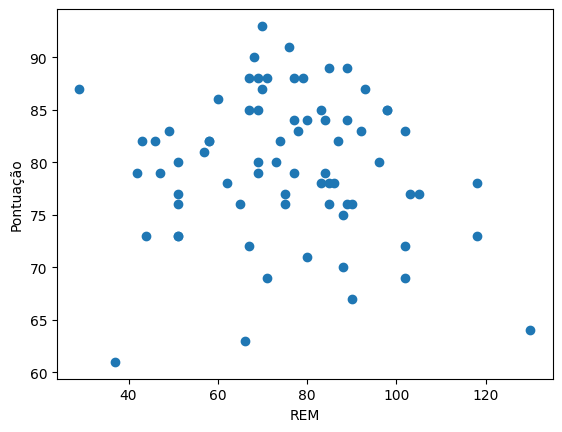

In [10]:
plt.scatter(x=raw_data["REM"], y=raw_data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("REM")
plt.show()

In [1]:
plt.scatter(x=raw_data["Sono profundo"], y=raw_data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("Sono profundo")
plt.show()

NameError: name 'plt' is not defined

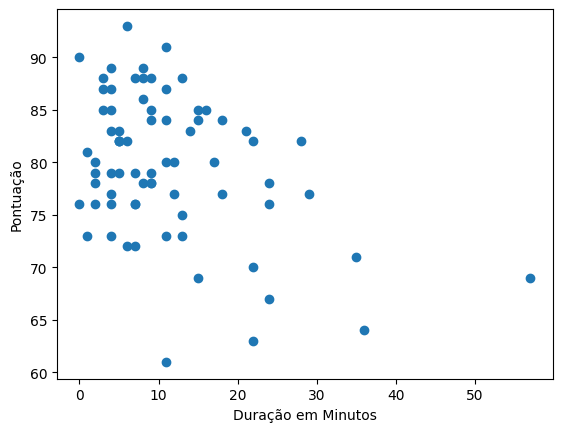

In [ ]:
plt.scatter(x=raw_data["Tempo acordado"], y=raw_data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("Tempo acordado")
plt.show()